# Treinamento DSA - Estudo de Caso 
## Big Data Real-Time Analytics com Python e Spark
### Analisar dados de aluguel de bikes, usadas como táxis, na cidade de Nova York
### continuação

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
bikes_df = pd.read_csv('bike_df_saved_v1.csv')

In [5]:
bikes_df.head(10)

,Data,Distancia,Tempo
0,2015-08-02,1.70,NaN
1,2015-08-03,1.40,NaN
2,2015-08-04,2.10,NaN
3,2015-08-06,2.38,NaN
4,2015-08-07,2.30,NaN
5,2015-08-08,3.40,NaN
6,2015-08-09,2.50,NaN
7,2015-08-10,3.36,0:28:37
8,2015-08-11,1.67,0:13:07
9,2015-08-12,1.42,0:10:35


In [6]:
bikes_df = pd.read_csv('bike_df_saved_v1.csv', parse_dates=['Data'])

In [7]:
bikes_df.head()

,Data,Distancia,Tempo
0,2015-08-02,1.70,NaN
1,2015-08-03,1.40,NaN
2,2015-08-04,2.10,NaN
3,2015-08-06,2.38,NaN
4,2015-08-07,2.30,NaN


In [8]:
bikes_df.dtypes

Data         datetime64[ns]
Distancia           float64
Tempo                object
dtype: object

In [9]:
bikes_df.set_index('Data', inplace=True)

In [10]:
bikes_df.head()

,Distancia,Tempo
Data,,
2015-08-02,1.70,NaN
2015-08-03,1.40,NaN
2015-08-04,2.10,NaN
2015-08-06,2.38,NaN
2015-08-07,2.30,NaN


In [15]:
#Função para converter a coluna de duração de tempo em segundos
def calcula_total_segundos(time):
    if time is np.nan:
        return np.nan
    hrs, mins, seconds = str(time).split(':')
    seconds = int(seconds) + 60 * int(mins) + 60 * 60 *int(hrs)
    return seconds

In [16]:
bikes_df['Segundos'] = bikes_df.Tempo.map(calcula_total_segundos)

In [17]:
bikes_df.head(10)

,Distancia,Tempo,Segundos
Data,,,
2015-08-02,1.70,NaN,NaN
2015-08-03,1.40,NaN,NaN
2015-08-04,2.10,NaN,NaN
2015-08-06,2.38,NaN,NaN
2015-08-07,2.30,NaN,NaN
2015-08-08,3.40,NaN,NaN
2015-08-09,2.50,NaN,NaN
2015-08-10,3.36,0:28:37,1717.0
2015-08-11,1.67,0:13:07,787.0


In [18]:
bikes_df.describe()

,Distancia,Segundos
count,81.000000,52.000000
mean,3.137531,1901.788462
std,3.634519,2560.424171
min,0.650000,376.000000
25%,1.370000,583.750000
50%,2.100000,1343.500000
75%,3.050000,1743.250000
max,26.200000,15643.000000


In [19]:
bikes_df.fillna(0).describe()

,Distancia,Segundos
count,81.000000,81.000000
mean,3.137531,1220.901235
std,3.634519,2240.756985
min,0.650000,0.000000
25%,1.370000,0.000000
50%,2.100000,573.000000
75%,3.050000,1426.000000
max,26.200000,15643.000000


In [20]:
bikes_df['Minutos'] = bikes_df['Segundos'].map(lambda x : x / 60)

In [21]:
bikes_df.head(10)

,Distancia,Tempo,Segundos,Minutos
Data,,,,
2015-08-02,1.70,NaN,NaN,NaN
2015-08-03,1.40,NaN,NaN,NaN
2015-08-04,2.10,NaN,NaN,NaN
2015-08-06,2.38,NaN,NaN,NaN
2015-08-07,2.30,NaN,NaN,NaN
2015-08-08,3.40,NaN,NaN,NaN
2015-08-09,2.50,NaN,NaN,NaN
2015-08-10,3.36,0:28:37,1717.0,28.616667
2015-08-11,1.67,0:13:07,787.0,13.116667


In [22]:
bikes_df.fillna(0).describe()

,Distancia,Segundos,Minutos
count,81.000000,81.000000,81.000000
mean,3.137531,1220.901235,20.348354
std,3.634519,2240.756985,37.345950
min,0.650000,0.000000,0.000000
25%,1.370000,0.000000,0.000000
50%,2.100000,573.000000,9.550000
75%,3.050000,1426.000000,23.766667
max,26.200000,15643.000000,260.716667


<AxesSubplot:xlabel='Distancia', ylabel='Minutos'>

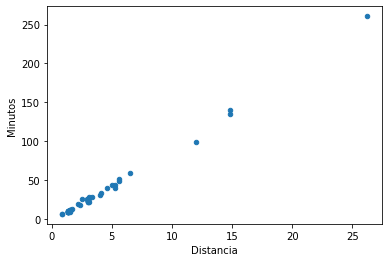

In [24]:
#Verificar a correlação entre os dados
bikes_df.plot(x = 'Distancia', y = 'Minutos', kind='scatter')

In [25]:
bikes_df.corr()

,Distancia,Segundos,Minutos
Distancia,1.000000,0.997203,0.997203
Segundos,0.997203,1.000000,1.000000
Minutos,0.997203,1.000000,1.000000


In [26]:
bikes_df.corr(method='spearman')

,Distancia,Segundos,Minutos
Distancia,1.00000,0.96482,0.96482
Segundos,0.96482,1.00000,1.00000
Minutos,0.96482,1.00000,1.00000


<AxesSubplot:>

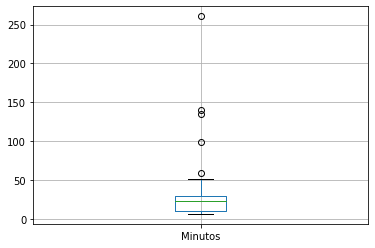

In [29]:
# Utiliando boxplot para verificar possiveis outlies(valores extremos, viagens que duraram muito mais tempo do que a média)
bikes_df.boxplot('Minutos', return_type='axes')



In [30]:
# Adicionado uma coluna com a variável min/Km
bikes_df['Min_Por_Km'] = bikes_df['Minutos'] / bikes_df['Distancia']

In [31]:
bikes_df.head(10)

,Distancia,Tempo,Segundos,Minutos,Min_Por_Km
Data,,,,,
2015-08-02,1.70,NaN,NaN,NaN,NaN
2015-08-03,1.40,NaN,NaN,NaN,NaN
2015-08-04,2.10,NaN,NaN,NaN,NaN
2015-08-06,2.38,NaN,NaN,NaN,NaN
2015-08-07,2.30,NaN,NaN,NaN,NaN
2015-08-08,3.40,NaN,NaN,NaN,NaN
2015-08-09,2.50,NaN,NaN,NaN,NaN
2015-08-10,3.36,0:28:37,1717.0,28.616667,8.516865
2015-08-11,1.67,0:13:07,787.0,13.116667,7.854291


In [32]:
bikes_df.fillna(0).describe()

,Distancia,Segundos,Minutos,Min_Por_Km
count,81.000000,81.000000,81.000000,81.000000
mean,3.137531,1220.901235,20.348354,4.959450
std,3.634519,2240.756985,37.345950,3.803856
min,0.650000,0.000000,0.000000,0.000000
25%,1.370000,0.000000,0.000000,0.000000
50%,2.100000,573.000000,9.550000,6.962963
75%,3.050000,1426.000000,23.766667,7.792350
max,26.200000,15643.000000,260.716667,10.000000


array([[<AxesSubplot:title={'center':'Min_Por_Km'}>]], dtype=object)

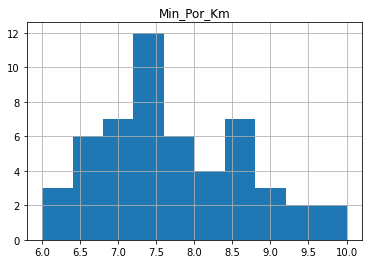

In [33]:
bikes_df.hist('Min_Por_Km')

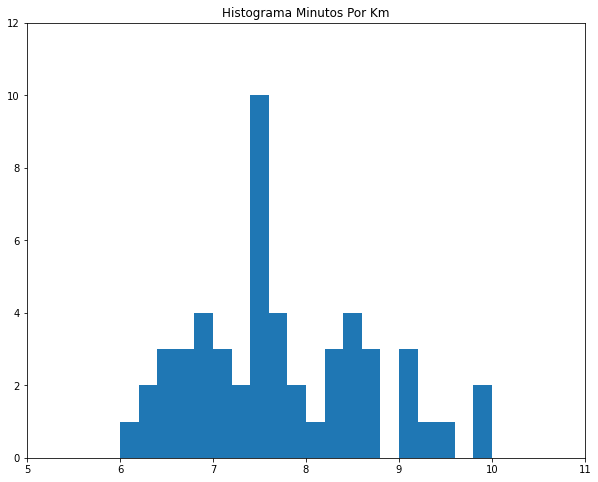

In [36]:
bikes_df.hist('Min_Por_Km', bins = 20, figsize = (10, 8))
plt.xlim((5, 11))
plt.ylim((0, 12))
plt.title("Histograma Minutos Por Km")
plt.grid(False)
plt.savefig('hist_minutos_por_km.png')